<a href="https://colab.research.google.com/github/rafaelfabri/Data-Science/blob/master/detec%C3%A7%C3%A3o_de_fraudes_em_cart%C3%B5es_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraude de Cartões de Créditos**

## **1. Introdução** 

Neste projeto foi estudado a detecção de fraudes de cartões de crédito, atualmente os bancos utilizam sistemas para prever quando um criminoso roubou ou hackeou o cartão de crédito de um respectivo cliente, assim se o sistema inferir que a transação está sendo feita por criminosos o cartão é bloqueado.

De acordo com informações do jornal [(oglobo)](https://oglobo.globo.com/economia/defesa-do-consumidor/clonagem-de-cartao-de-credito-a-fraude-mais-comum-no-pais-23676676) em um período de 12 meses entre _(03/2018 à 03/2019)_ ocorreu um número de 8,9 milhões de fraudes.

Já jornal online [(extra)](https://extra.globo.com/noticias/economia/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-18-bilhao-em-12-meses-23908141.html) afirma que em um período de 12 meses os bancos tiveram um prejuízo financeiro de 1,8 bilhões de reais no Brasil.

![alt text](https://conteudo.imguol.com.br/c/noticias/79/2017/11/16/cartao-de-credito-cartao-de-debito-cartoes-1510842383867_1920x1080.jpg)

Esses sistemas de bloqueio de cartões é um ótimo meio de segurança para os clientes de banco no mundo todo, porém como todo sistema informatizado também é suscetível a erros.

Um desses erros pode incomodar muito o próprio cliente, pois quem já não passou pela situação de passar o cartão em uma compra diferente, ou em um horário atípico e ter o problema do cartão ser bloqueado erroneamente. Isso ocorre, pois o banco acreditou que a pessoa que utilizou o cartão não era você, mas sim um criminoso, com certeza isso é muito constrangedor e incomodo para os clientes. Existe outro incomodo também, quem não passou por uma situação onde se deparou com compras diferentes não feitas respectivamente por esse dono do próprio cartão, tendo como resultado que alguém acabou clonando o seu cartão.


![alt text](https://image.freepik.com/free-vector/quality-levels-knob-button-wireframe-hand-turning-quality-level-knob-maximum-position_127544-128.jpg)

Atualmente as empresas possuem em sua cultura organizacional o foco no cliente, pois é a satisfação do cliente que traz o lucro e competitividade as grandes companhias, e isso não são diferentes em bancos. 

Como os bancos são empresas de serviços, os clientes acabam tendo alta visibilidade da empresa, pois estão em contato direto com os serviços. Dessa maneira acaba surgindo maiores desafios no comprometimento com a qualidade, foco no cliente, confiabilidade, flexibilidade, rapidez e entre outros indicadores para que este banco seja competitivo no mercado, e claramente a área de detecção de fraudes está interligada com esses indicadores, pois estes podem trazer insatisfações para clientes caso não sejam bem executada. 


Assim atualmente surgiu um desafio para os bancos que estão começando a utilizar modelos de **_machine learning_** para detecção de fraudes bancarias, o que pode aumentar a precisão destes sistemas e assim melhorar a satisfação de seus clientes.

## **Sumário**

* 1. Introdução
* 2. Objetivo
* 3. Dados
  * 3.1 Importação dos dados
* 4. Análise exploratória
  * 4.1 Visualização do data set
  * 4.2 Descrição estatística de cada variável
  * 4.3 Dados ausentes
  * 4.4 Dados desbalanceados
  * 4.5 Histogramas
  * 4.6 Correlações
* 5. Soluções para dataset
  * 5.1 Pontos discrepantes na variável Amount
  * 5.2 Desbalancemento de dados
* 6. Machine Learning
  * 6.1 Aplicando modelo de machine learning
    * 6.1.1 Modelo de ML sem o balancemento de dados
    * 6.1.2 Modelo de ML com o balancemento de dados
      * 6.1.2.1 Modelo de ML com o balancemento de dados através do Over Sampling
      * 6.1.2.2 Modelo de ML com o balancemento de dados através do Under Sampling
  * 6.2 Discussão de perspectiva da empresa através do modelo de ML




## **2. Objetivo** 

![alt text](https://image.freepik.com/free-photo/business-strategy-success-target-goals_1421-33.jpg)

Objetivo deste projeto é primeiramente fazer uma análise exploratória referente ao *dataset*, com o intuito de entender melhor o conjunto de dados, e verificar se há possíveis problemas antes de criar o modelo de *machine learning*.

Já na criação do modelo o objetivo é verificar o problema de não realizar o balanceamento de dados e um *dataset*, e a comparação entre dois métodos utilizados para resolver este problema, chamados *Under Sampling* e *Over Sampling*.

Além disso esse é o meu premeiro projeto de machine learning, logo tenho altas expectativas de aprendizado e desenvolvimento.

## **3. Dados**

Os dados foram obtidos através de uma das competições do Kaggle. Os dados são referentes a setembro de 2013 referentes aos cartões de pessoas européias. 

Existe um problema relacionado a esse conjunto de dados, que é o desbalanceamento de dados, durante o período de avaliação houve 492 fraudes entre 284.807 transações no total. A solução deste problema será mostrada ainda neste projeto.

Outro ponto a se ressaltar em relação a esse _data set_ é que houve uma transformação PCA, isto é feito com intuito de diminuir o número de variáveis/coluna e também de confidenciar as informações dos respectivos clientes, logo as colunas possuem nomes V1, V2, V3 e etc.

Para mais informações, o _data set_ foi retirado deste [link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

### **3.1 Importação dos dados**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

## **4. Análise exploratória**

![alt text](https://image.freepik.com/free-vector/statistics-concept-illustration_114360-172.jpg)

Neste tópico foi realizado uma análise exploratória de dados, com o objetivo de ter uma melhor percepção e entendimento do conjunto de dados estudado. Outro motivo de se realizar uma análise exploratória é com o intuito de descobrir se há outliers (pontos discrepantes) e dados ausentes, estes que podem prejudicar o modelo de *machine learning*.

Foram realizados neste projeto algumas análises como descrição estatísticas das variáveis, ausência de dados, matriz de correlação e entre outras.

### **4.1 Visualização do data set**

Abaixo é possível visualizar as 5 primeiras linhas do _data set_, nesta também pode-se notar que praticamente todas as colunas estão sendo mencionadas de v1 a v28 com intuito de mante-las anônimas para proteção dos clientes.

É possível verificar que apenas a coluna *Time, Amount e Class* não foram colocadas de maneira anônima.

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Descricão de variáveis**

* time - Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* amount - Valor da transação
* class - 1 para transações fraudulentas, 0 caso contrário

**Quantidade de linhas e colunas**

In [0]:
print('quantidade de linhas \t\t\t', df.shape[0])
print('quantidade de colunas/variáveis \t', df.shape[1])

quantidade de linhas 			 284807
quantidade de colunas/variáveis 	 31


### **4.2 Descrição estatística de cada variável**

Abaixo é mostrado os resultados estatísticos de cada variável.

Deve-se ter atenção nas variáveis *Amount*, para a variável time não é necessário verificar, pois este é o número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados, logo este valor não irá ter uma média normal por ser uma variável tempo e também uma variável aleatória.

In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Nota-se que a variável *Amount* apresenta um desvio padrão muito maior do que a média, indicando que existe uma alta variabilidade destes dados.

* média = 88.349619 
* desvio padrão = 250.120109

Também nota-se uma grande diferença entre a média e mediana.

* mediana = 22.000000

Esses dois quesitos comentados acima indicam uma alta possibilidade de haver Outliers na variável *Amount* (valor das transações). Porém para se afirmar e visualizar esses outliers, abaixo foi realizado um gráfico boxplot. 

Para quem nunca ouviu falar de boxplot abaixo será explicado rapidamente sobre esta visualização.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elements_of_a_boxplot_pt.svg/400px-Elements_of_a_boxplot_pt.svg.png)

Pode ser ver que o nome boxplot (gráfico de caixas) é bem explicativo, pois o gráfico é literalmente uma caixa. 

Observa-se que existe uma caixa que é delimitada pelo primeiro quartil e terceiro quartil, e entre elas não respectivamente no meio se encontra a mediana, logo a maioria dos dados se encontram neste quadrado, uma parte dos dados estão fora desta caixa estando até os limites inferior e superior. Mas os dados que estão fora desses limites são considerados discrepantes, pois fogem do padrão deste conjunto.

Abaixo foi realizado o boxplot da variável Amount.

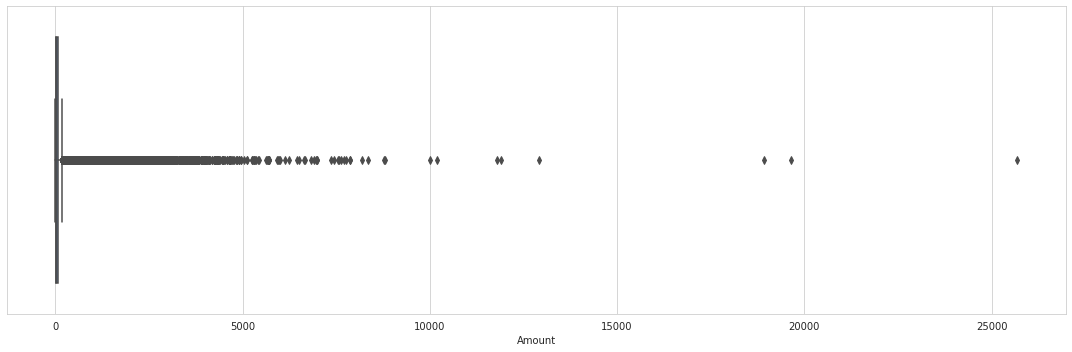

In [0]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(x='Amount', data=df, ax=ax, palette='deep')

fig.tight_layout();

Pode-se perceber que pelos pontos estarem muito distantes, não é possível ver caixa do boxplot,mas todos os pontos que estão fora da dos limites são outliers, e percebe-se que existem muitos, para um cálculo de proporção de quantos pontos estão fora vamos fazer um cálculo abaixo.



In [0]:
print('percentual de dados ausentes', (df[df['Amount']>300]['Amount'].count()/df['Amount'].count())*100, '%')

percentual de dados ausentes 6.341487393217162 %


Aqui é possível ser um problema no data set estudado, 6,34% dos valores efetuados no cartão de crédito estão acima de 300 euros, e estes não seguem o padrão da população local, sendo Outliers. A frente no próximo tópico(5) será proposto uma solução para este problema.

### **4.3 Dados ausentes**

Abaixo foi verificado se existia algum dado ausente.

In [0]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Nota-se que o _data set_ possui nenhum dado ausente, mostrando a alta confiabilidade destes dados, e não agregando nenhum problema neste projeto relacionado a dados ausentes.

### **4.4 Dados desbalanceados**

Como informado no kaggle este conjunto de dados apresenta alta desproporção dos dados que foram fraudes e que foram transações normais.

Abaixo foi realizado um gráfico de barras para uma visualização desta diferença, mas antes foi mostrado alguns números que indicam essa desproporcionalidade.

In [0]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Acima pode-se ver que apenas 492 transações são fraudes, já o número de transações normais são 284315.

A proporção de porcentagem de cada um encontra-se abaixo.

In [0]:
print('transações normais feitas pelo próprio do cartão:', (round(df['Class'].value_counts()[0]/df.shape[0],6)*100),'%')
print('transações fraudulentas:', (round(df['Class'].value_counts()[1]/df.shape[0],6)*100),'%')

transações normais feitas pelo próprio do cartão: 99.8273 %
transações fraudulentas: 0.1727 %


Acima é evidente que há uma desproporção muito grande dos resultados apenas 0,1727% são fraudes,abaixo pode ser visto de melhor maneira com gráfico de barras.

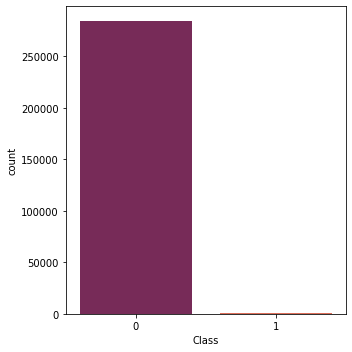

In [0]:
fig, ax = plt.subplots(nrows=1, figsize=(5,5))

sns.countplot(x='Class', data=df, ax=ax, palette='rocket')


fig.tight_layout();

Com o gráfico realizado e a diferença em porcentagem calculada, fica evidente a diferença entre as transações que foram fraudes e as transações normais.

Essa desproporção pode prejudicar o modelo de machine learning, pois com poucos resultados de fraudes o modelo não conseguirá aprender e prever de maneira eficiente. 

No próximo tópico(6) estará a solução para este problema.

### **4.5 Histogramas**

É muito importante termos uma ideia de como se comporta algumas variáveis do _data set_, a partir disto abaixo foi realizado o histograma relacionado a variável time.

Foram plotados dois histogramas da variável tempo, o histograma realizado foi o de quantidade de ocorrência com os dados distribuidos em 50 caixas. 

* Um histograma apresenta a variável tempo para Class igual a 0, onde as transações foram normais
* Outro histograma apresenta variável tempo para Class igual a 1, onde as transações eram fraudes.


No eixo y aparece a quantidade de transações em um determinado intervalo de tempo de um caixa que é delimilatada pelo eixo x.

y: quantidade de ocorrência transações

x: tempo entre a primeira transação e a realizada.



**Histograma variável time para transações normais**

In [0]:
x_time_0 = df[df['Class']==0]
x_time_1 = df[df['Class']==1]

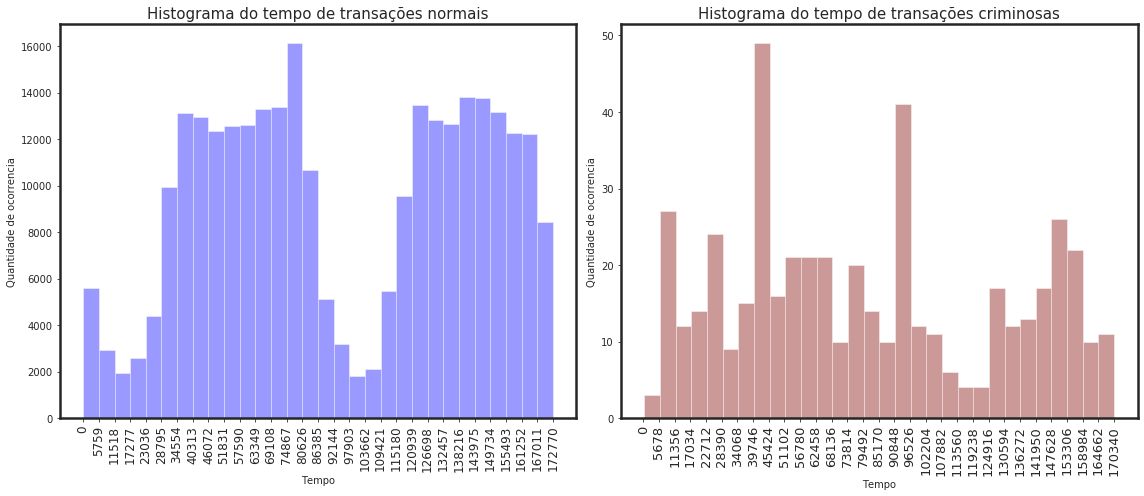

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots(ncols = 2, figsize=(16,7))

sns.distplot(x_time_0['Time'], ax=ax[0], color='blue', kde=False, bins=30)

ax[0].set_title("Histograma do tempo de transações normais", fontsize=15)
ax[0].set_xticks(range(0, 175000, 5759) )


ax[0].tick_params(axis='x', rotation=90, labelsize=12)


ax[0].set_ylabel('Quantidade de ocorrencia')
ax[0].set_xlabel('Tempo')

for axis in ['left', 'bottom', 'right', 'top']:
    ax[0].spines[axis].set_linewidth(2.5)


sns.distplot(x_time_1['Time'], ax=ax[1], color='#800000', kde=False, bins=30)

ax[1].set_title("Histograma do tempo de transações criminosas", fontsize=15)
ax[1].set_xticks(range(0, 175000, 5678))

ax[1].tick_params(axis='x', rotation=90, labelsize=13)

ax[1].set_ylabel('Quantidade de ocorrencia')
ax[1].set_xlabel('Tempo')

for axis in ['left', 'bottom', 'right', 'top']:
    ax[1].spines[axis].set_linewidth(2.5)


fig.tight_layout();

**Histograma variável time para transações normais**

Nota-se através do histograma que não existe semelhança com nenhuma distribuição. Mas é possível afirmar que em dois intervalos de tempos houve uma maior quantidade de transações.

Estes intervalos são entre o tempo de:
* 34554 segundos e 80626 segundos
* 120939 segundos e 167011 segundos

Aqui não é possível inferir nenhuma hipótese, mas foi possível verificar como se comporta o conjunto de dados para variável time de transações não fraudulentas.

**Histograma variável time para transações fraudulentas**

Neste histograma percebe-se que não existe nenhum padrão, e também esta não se é semelhante a nenhuma distribuição, apenas é possível verificar alguns períodos de tempo onde tiveram maior quantidade de transações fraudulentas exemplo:

 * 39746 segundos à 45424 segundos 
 * 90848 segundos à 102204 segundos

 Seria necessário verificar com maior detalhe para esses dois picos, mas como não possui-mos mais informações ou até o horário respectivo destas transações não foi possível inferir mais algumas coisas sobre esse gráfico.

**Histograma variável time para transações fraudulentas**

**Histograma variável Amount**

Abaixo foi realizado um histograma da variável *Amount* que apresenta o valor de cada transação.

Com este histograma pode-se verificar quais foram os valores mais frequentes das transações.

Um dos histogramas é referente a:

* Aos valores monetários de transações normais igual a Class == 0
* Aos valores monetários de transações que eram fraudes Class == 1 

In [0]:
x_amount_0 = df[df['Class']==0]
x_amount_1 = df[df['Class']==1]

Abaixo foram realizados alguns códigos para construir os valores dos ticks para uma melhor visualização do histograma.

In [0]:
#contruindo ticks
x_a0=list()
soma = 256
for i in range(0, 1793, soma):
   x_a0.append(i)
for i in range(2304, 26000, 512):
   x_a0.append(i)

In [0]:
x_0min = list()
for i in range(1792, 26000, 1024):
    x_0min.append(i)

In [0]:
x_amount_1['Amount'].max()/100

21.258699999999997

In [0]:
x_a1 = list()
for i in range(0, 2125, 42):
  x_a1.append(i)

* Logo encontra-se o histograma da variável *Amount* (valor da transação realizada) para a variável *Class* == 0 (transações normais) e para variável Class 1 (transações criminosas).

Resumindo este histograma mostra a quantidade de ocorrências de determinados valores para transações de cada tipo (0 ou 1).



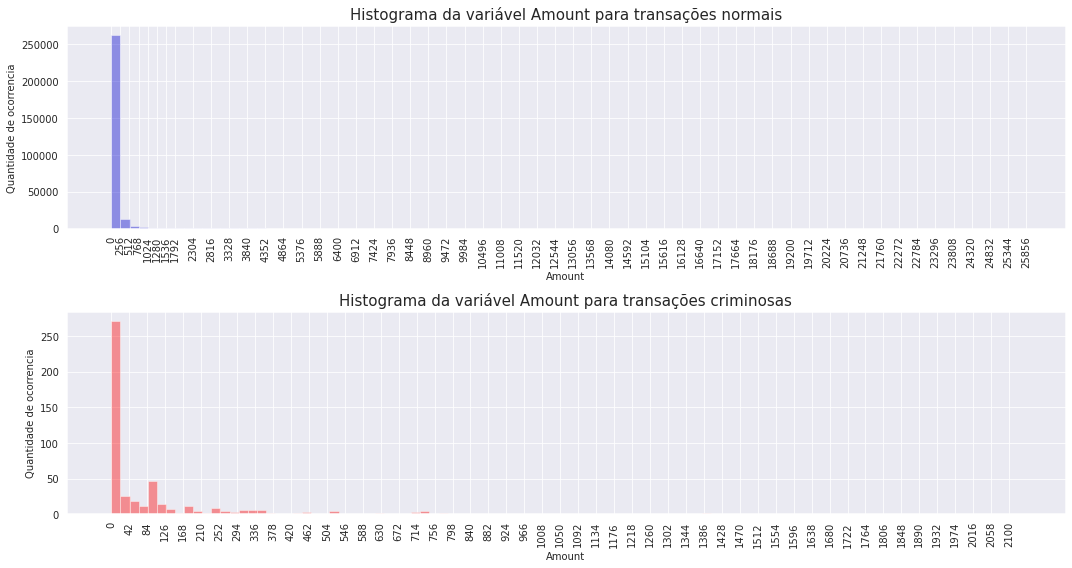

In [0]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=2, figsize=(15, 8))


sns.distplot(x_amount_0['Amount'], ax=ax[0], color='#0000CD', kde=False, bins=100)


#perfumaria de ax
ax[0].set_xticks(x_a0)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('Quantidade de ocorrencia')
ax[0].set_title("Histograma da variável Amount para transações normais", fontsize=15)

for axis in ['left', 'bottom', 'right', 'top']:
    ax[0].spines[axis].set_linewidth(2.5)

sns.distplot(x_amount_1['Amount'], ax=ax[1], color='red', kde=False, bins=100)

ax[1].set_title("Histograma da variável Amount para transações criminosas", fontsize=15)
ax[1].set_xticks(x_a1)
ax[1].set_ylabel('Quantidade de ocorrencia')
ax[1].tick_params(axis='x', rotation=90)

for axis in ['left', 'bottom', 'right', 'top']:
    ax[1].spines[axis].set_linewidth(2.5)


fig.tight_layout();

**Histograma da variável Amount para transações normais**

Pode-se perceber que a distribuição da variável Amount para as transaçãoes normais segue uma distribuição **exponencial**. Percebe-se que a maior parte das quantidades de transações estão entre os valores de 0 unid e 256 unid, esse são os valores mais frenquentes realizados em uma transações.

As transações seguem uma distribuição exponencial e são semelhantes com os exemplos da imagem abaixo.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Exponential_distribution_pdf.png/1200px-Exponential_distribution_pdf.png)

Não será aprofundado em detalhes a respeito de distribuições neste projeto, mas nota-se que existem vários tipo de distribuição exponencial, algumas tem uma queda decrescente mais rápida, outra com menas intensidade, isso acaba sendo depende da variável lambda, sendo a com maior lambda mais semelhante a distribuição da variável *Amount*.

 


**Agora restou o último histograma da variável *Amount* relacionado as transações que foram fraudes (Class=1).**



Nota-se que a maior quantidade de fraudes de transações foram de valores entre 0 e 21, percebe-se que valores de 84 à 105 também apresenta uma alta quantidade de ocorrência. Esse variável um pouco semelhante a exponencial, porém existem uns picos no meio dessas.

### **4.6 Correlações**

Abaixo foi realizado uma imagem de correlação entre cada variável do conjunto de dados.

Pode-se notar que existe uma legenda ao lado, onde cada cor é associada a um tipo de valor de correlação. Estes valores vão de -1 a 1, e também são indicados em cada quadrado junto com a sua respectiva cor.

Como maior parte das variáveis são do tipo PCA essas acabam sendo anonimas, mas pode-se ver que existem algumas correlações entre as variáveis conhecidas e as anônimas.

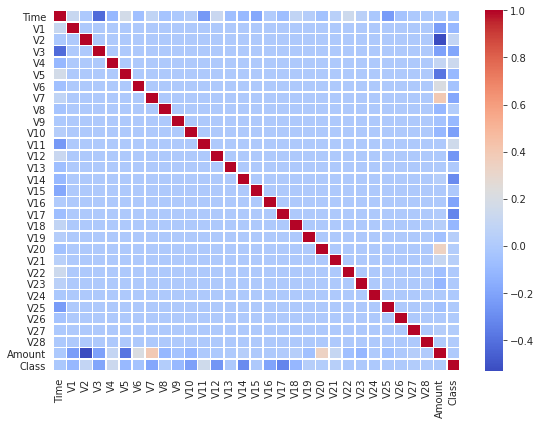

In [0]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(data=df.corr(), ax=ax, cmap='coolwarm', linewidths=0.5)

fig.tight_layout()

Primeiramente são muitas variáveis para análisar, logo abaixo foi mostrado as que tiveram maior correlação positiva ou negativa, é bom ressaltar que praticamente todas as variáveis são anonimas assim não podemos inferir muito sobre as correlações.

* Amount - V7  =  0.40
* Amount - V20 =  0.34
* Amount - V2  = -0.53

Porém é possível perceber que existe poucas correlações no dataset, isso pode ocorrer por este dataset estar desbalançeado, após iremos verificar novamente. 

## **5. Soluções para dataset**

Com a realização da análise exploratória teve-se um maior entendimento do conjunto de dados, como também percebeu-se que existem alguns problemas que devem ser corrigidos antes da criação do modelo de machine learning.

Dois problemas encontrados foram:

* Presença de pontos discrepantes na variável Amount
* Desbalancemento de dados

### **5.1 Pontos discrepantes na variável Amount**

De acordo com o capítulo anterior, foi visto que existe uma boa quantidade de Outliers na variável Amount.

Sabemos que estes pontos discrepantes são prejudiciais para análise e para o modelo de machine learning. Porém, esses dados não são incorretos, pois é normal que exista uma grande variabilidade de valores em transações, claro a maioria das pessaos fazem transações diárias de pequena e média quantia, mas também existem ocasiões de compras de aparelhos eletrônicos, motos, televisões que possuem uma maior valor, logo esses são os motivos dos outliers da variável Amount.

Dessa maneira seria errado escolher por remover esses outliers, assim foi proposto uma solução diferente para esse problema.


Para resolver este problema foi realizada a normalização dos dados da coluna *Amount*.

A normalização foi realizada através da biblioteca **Scikit-learn** utilizando especificamente a função **StandardScaler**.

Abaixo foi importada a biblioteca, e realizado a normalização dos dados da variável *Amount*.

In [0]:
#importando a biblioteca
from sklearn.preprocessing import StandardScaler

#atribuindo função para um variável
std_scaler = StandardScaler()

#criando novas colunas normalizadas no novo data frame
df_new = df.copy()

df_new['std_Amount'] = std_scaler.fit_transform(df_new[['Amount']]) 
#df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1)) também da para fazer assim

df_new.drop('Amount', axis=1, inplace=True)

Nota-se que para não haver problemas como o data set original, foi realizado um cópia para um data set novo chamado de **df_new**, neste foi atribuído a nova coluna **std_Amount** que é a coluna Amount normalizada, e após foi excluída a coluna Amount.

Abaixo pode-se ver novamente as 5 primeiras linhas do df_new, e nota-se a nova coluna **df_new**.

In [0]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Assim esse primeiro problema foi removido.

### **5.2 Desbalancemento de dados**

Outro problema encontrado com a análise exploratória de dados foi o desbalanceamento de dados.

Foi notado que existiam:

* transações normais feitas pelo próprio do cartão: 99.8273 %
* transações fraudulentas: 0.1727 %

Se esses dados forem utilizados diretamente no modelo de machine learning, pode-se dizer literalmente, que nosso modelo não irá ter capacidade de aprender a detectar as fraudes em transações pela pequena quantidade de dados.

Assim é necessário resolver este problema de alguma maneira. A abordagem tomada para resolver este problema é o *Sampling*.

Esse problema será resolvido dentro do tópico de machine learning (6), após a separação de dados.

## **6. Machine Learning**

Finalmente chegamos na parte final deste projeto, neste capítulo foi criado o modelo de machine learning para predição de fraudes de cartão de crédito.

Existem vários métodos de machine learning, mas para este problema onde deve-se saber se o resultado da transação que está na coluna Class é 0 ou 1: 

* 0 - Transação não fraudulenta
* 1 - Transação fraudelenta

deve-se utilizar a regressão logística, esta que dará como resultado 0 ou 1, apenas uma dessas situações.

### **6.1 Aplicando modelo de machine learning**

Foi feito dois modelos de machine learning, o primeiro foi sem fazer o balanceamento de dados, e depois com o balanceamento realizado.

Assim é possível ver a diferença entre os resultados, e como não fazer o balanceamento de dados dará resultados ruins ao modelo.



#### **6.1.1 Modelo de ML sem o balancemento de dados**

Agora começa a criação do modelo de machine learning. 

Será utilizada a biblioteca ScikitLearn, abaixo foi importado todas as funções necessários para sua realização.

In [0]:
!pip install -q scikit-plot

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score 
import scikitplot as skplt

Com as bibiliotecas importadas o primeiro passo a se realizar é separar o conjunto de dados em treino e teste, para isso foi atribuído as variáveis indepedentes para a variável *X* abaixo, e a variável Class dependete para *y*. 

In [0]:
#separando o conjunto de dados em outras variáveis
X = df_new.drop('Class', axis=1)
y = df_new['Class']

Agora com essas duas variáveis foi utilizado a finção train_test_split() para a separação do conjunto treino e teste.

In [0]:
#separando o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Dentre alguns parâmetros importantes utilizados dentro da função train_test_split():

* stratify: foi utilizada pela razão de que todo data set apresenta um poucos resultados de Class igual a 1, logo existe a possibilidade que na separação haja uma divisão onde não fique nenhum valor 1 contido nas variáveis test ou na variável train.

Abaixo pode-se perceber que o parâmetro stratify separou proporcionalmente os dados com class==1.

In [0]:
print('Quantidade de valores 1 no conjuto teste', (y_test==1).sum())
print('Quantidade de valores 1 no conjuto treino',(y_train==1).sum())

Quantidade de valores 1 no conjuto teste 123
Quantidade de valores 1 no conjuto treino 369


Abaixo será treinado o modelo com o conjunto X_train e y_train.

In [0]:
ml_model = LogisticRegression()
ml_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Com o modelo treinado pode-se realizar a predição da variável X_test, para que assim possa realizar a comparação entre a predição e o resultado real.

Abaixo foi realizado a predição,

In [0]:
y_pred = ml_model.predict(X_test)

Com a predição realizada abaixo foi verificado os resultados da predição.

In [0]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9993    0.9996    0.9994     71079
           1     0.7292    0.5691    0.6393       123

    accuracy                         0.9989     71202
   macro avg     0.8642    0.7844    0.8194     71202
weighted avg     0.9988    0.9989    0.9988     71202



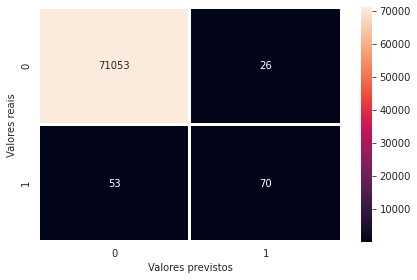

In [0]:
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, linewidths=2, fmt='')
ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")


fig.tight_layout()

**Resultados para o primeiro modelo de machine learning**




Acima pode-se ver a matriz de confusão.

> **Transações normais:**

 Na linha *transações normais (Class == 0)*, percebe-se que existe um quadrado com 71053 e outro com 26.

 Somando o resultado total de transações não criminosas, obtêm-se o resultado: 

$$ 71053 + 26 = 71079 $$
****
****
 Probabilidade de acerto:
* Logo existem 71053 transações normais no conjunto teste e desse total, 71053 foram previstas como transações normais, essa foi a quantidade de transações normais que o modelo acertou.
* Porém o modelo acabou considerando 26 dessas transações normais como fraudes, essa foi a quantidade de transações normais que o modelo errou. 

Dando assim que a probabilidade de acertos do modelo, quando for realmente uma transação normal, não criminosa o:

 $$ Recall = \frac{71053}{71079} = 0,9996 $$

Esse valor também está na tabela acima.
****
****
Resumindo essa discussão foi feita com o intuito de mostrar que o modelo de *machine learning* tem uma alta probabilidade de detectar transações normais, sendo próxima de 100%.



> **transações fraudulentas:**

 Na matriz de confusão pode-se perceber que na linha 1 existe uma quantidade de 53 e outra de 70.

 Somando o resultado total de transações criminosas são: $$53+70 = 123$$

 assim esse resultado representa que 123 entradas foram transações criminosas *(Class==1)*.
****
****

 * Logo de 123 fraudes em transações 53 foram previstas pelo modelo como transações normais, logo o modelo errou em 53 transações.

 * Porém de 123 dessas fraudes, 70 foram previstas pelo modelo como realmente transações criminosas, logo o modelo acertou 70 vezes.

Logo o percentual de acertos do modelo quando a transalção foi criminosa:

$$Recall = \frac{70}{123} = 0,5691$$

Esse valor encotra-se na tabela acima também.
****
****
Assim podemos concluir que em transações criminosas (onde um criminosos que roubou o clonou seu cartão), o modelo acerta 0,6585 das vezes, sendo muito inferior as transações normais. Resumindo este resultado foi bem ruim com 65,85% de acertos.

Isso ocorreu pela razão que foi dita antes neste projeto, não existem dados suficientes para que o modelo treinasse e aprendesse a detectar os tipo de transações criminosas, e neste projeto foi mostrado esse problema.

Logo abaixo será feito o balanceamento de dados para que seja notada a diferença entre os resultados.

#### **6.1.2 Modelo de ML com o balancemento de dados**

##### **6.1.2.1 Modelo de ML com o balancemento de dados através do Over Sampling**

Bem agora iremos resolver o problema de haver poucos valores de fraudes *(Class==1)* no data set como um todo.

Para isso foi feito o balanceamento de dados, o método utilizado foi o **sampling** que são divididos em dois métodos:

* Over Sampling: tem o objetivo de  criar novos dados a partir da classe minoritária de acordo com as informações contidas no data set. Normalmente isso pode ser feito por clustering ou sinteticamente.
* Under Sampling: tem o objetivo de eliminar dados da classe majoritária, ou seja elimina aleatoriamente entradas da classe com maior número de ocorrências.

Existem vantagens e desvantagens nestes métodos.

É desvantajoso utilizar o Under Sampling, pois é perdido grande número de dados com o objetivo que haja proporcionalidade entre os dados, nessa situaçao *Class == 0* vai perder vários dados até ficar na mesma quantidade de *Class ==1*.

Por essa razão neste projeto foi utilizado o método Over Sampling que tem como foco criar novos dados até que o tipo de variáveis *Class == 1* tenha a mesma quantida do que *Class == 0*.  



Para utilizar o Over Sampling, foi utilizada a biblioteca imblearn, especificamente a função RandomOverSampler, como mostrado a baixo onde foi importado a biblioteca.

In [0]:
from imblearn.over_sampling import RandomOverSampler

Abaixo foi utilizada a função RandomOverSampler, e utilizado as variáveis X e y, lembrando que:

* X: possui todas as variáveis independentes do data set
* y: possui a variável Class dependente

Logo essas duas variáveis tem todos as entradas do conjunto de dados, e assim estes foram utilziados dentro da função ros.fit_sample, esta que criou novo dados para o tipo Class==1 e atribuindo todos as variáveis X_ros e y_ros.

In [0]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Abaixo está um gráfico de barras que mostra como as está proporcional as duas variáveis.

In [0]:
y_ros = pd.Series(y_ros)

 Abaixo pode ser visto o conjunto de dados estão realmente balanceados.

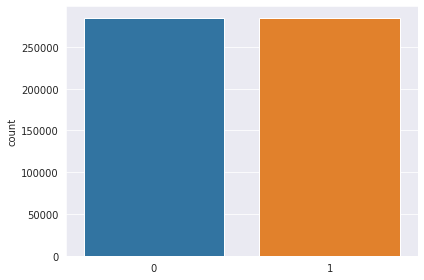

In [0]:
fig, ax = plt.subplots()

sns.countplot(y_ros)

fig.tight_layout();

Abaixo foi plotado um heatmap par verificar as correlações presentes para cada variável, neste observa-se dois heatmap, pois agora com as variáveis balanceadas é possível ver a diferença entre antes de balanceada e depois.

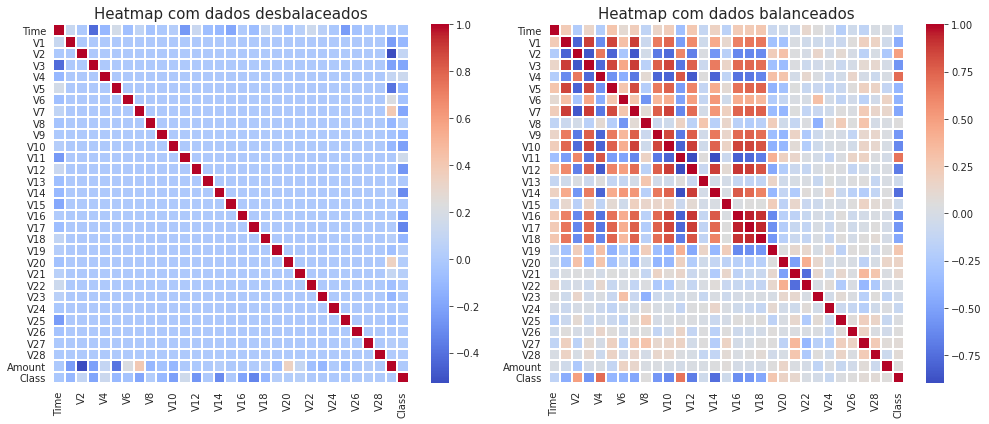

In [0]:
#ajustando nova variável heat para criação do novo heatmap
heat = pd.DataFrame(X_ros)
heat['Class'] = 0
heat['Class'] = y_ros
heat.columns = df.columns

fig, ax = plt.subplots(ncols = 2, figsize=(14,6))

sns.heatmap(data=heat.corr(), ax=ax[1], cmap='coolwarm', linewidths=1)
sns.heatmap(data=df.corr(), ax=ax[0], cmap='coolwarm', linewidths=1)

ax[0].set_title("Heatmap com dados desbalaceados", fontsize=15)
ax[1].set_title("Heatmap com dados balanceados", fontsize=15)


fig.tight_layout();

Observa-se uma grande diferença entre o antes e depois do balancemento.

Com o balanceamento de dados nota-se que agora é possível ver correlações antes não existia, exemplo em toda a parte esquerda superior apareceu altas correlações posítivas e negativas. 

Com isso será separado o novo conjunto de dados que estão balanceados, e estes serão todos atrubuídos para nova respectivas variáveis que estão com o nome ros.

In [0]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros)

Separado o conjunto de dados em treino e teste, pode-se agora realizar o treino do modelo de machine learning com as variáveis treino, como foi feito abaixo.

In [0]:
ml_model.fit(X_train_ros, y_train_ros)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Agora com o modelo treinado foi utilizada a variável x_test_ros para prever os valores de Class se as transações são fraudes ou não. 

In [0]:
y_pred_ros = ml_model.predict(X_test)

Com o modelo treinado pode-se comparar os resultado previstos pelo modelo de machine learning e o real resultado. Isso foi realizado abaixo, como pode ser visto na tabela que mostra os valores de precisão e recall, e também foi feita uma matriz de confusão. 

In [0]:
print(classification_report(y_test, y_pred_ros, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9699    0.9846     71079
           1     0.0489    0.8943    0.0927       123

    accuracy                         0.9698     71202
   macro avg     0.5244    0.9321    0.5387     71202
weighted avg     0.9982    0.9698    0.9831     71202



Abaixo foi realizado a matriz de confusão, nota-se que essa matriz é semelhante a anterior e aprensenta dentro de cada respectivo quadrado um valor.

Porém antes de verificar a matriz de confusão pode-se perceber uma melhora de todos os parâmetros referentes a Class==1, se vê uma diminuição dos valores de Class==0, porém isso é normal, faz parte perder um pouco de precisão em uma variável mas ganhar em outra, isso será explicado melhor abaixo.


##### **Resultados Over Sampling**

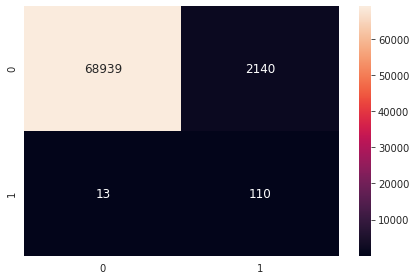

In [0]:
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred_ros), ax=ax, annot=True,annot_kws={"size": 12}, fmt='')

fig.tight_layout()

**Transações normais *(Class == 0)***

Primeiramente vamos analisar as entradas que possuiam *(Class==0)*, e verificar o valor de seu recall através de calculos para um melhor entendimento, logo estaremos olhando para linha 0. 

O somatório dos dois quadrados da linha 0 é:

*(Class == 0)* : $$68939 + 2140 = 71079$$

****
****
* De 71049 transações normais (Class==0), 68592 foram previstas pelo modelo de machine learning como realmente sendo transações normais, logo o modelo acertou 68592 dando um percentual de:

$$ Recall = \frac{68939}{71079} = 0.9699 $$

****
****

* Já de 71079 transações normais *(Class == 0)*, 2577 foram previstas como fraudes, o modelo previu como sendo *(Class == 1)*, esses sendo a quantidade de erro do modelo, com  um percentual de erro:


Mesmo havendo uma diminuição do valor de acertos para *(Class == 0)* ainda continua sendo um ótimo resultado.



**Transações fraudulentas *(Class==1)***

Agora vamos focar na segunda linha que apresenta as entradas de onde as transações foram criminosas *(Class == 1)*.

Somando os dois quadrados da segunda linha:

*(Class == 1)*:$$ 110 + 13 = 123 $$
****
****
* De 123 fraudes em transações, 13 dessas foram previstas pelo modelo de machine learning como transações normais, logo esses foram resultados errados.
****
****
* De 123 fraude em transações, 110 foram previstas pelo modelo como realmente sendo fraudes, logo essa foi a quantidade de fraudes que o modelo acertou:

$$ Recall = \frac{110}{123} = 0.8943 $$

****
****

A partir deste resultado é possível perceber uma significativa melhora no modelo de machine learning, com o balanceamento o modelo teve um maior conjunto de dados do tipo *(Class == 1)*, assim o modelo teve maior capacidade de aprender como prever com maior eficiencia transações criminosas.



É possível ver esses valores de recall na tabela de classificação feita acima, como os valores de recall deram altos e também a accurária do modelo que representa um percentual global, agora pode-se dizer que o modelo de machine learning criado apresenta resultados satisfatórios.

Abaixo pode-se ser novamente a mesma matriz de confusão acima, porém com os valores de porcentagem de cada.

**Resultados Over Sampling**

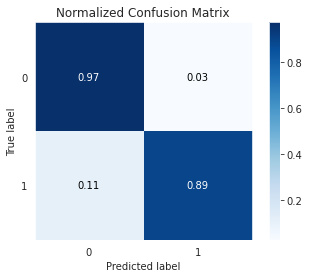

In [0]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ros, normalize=True)

Para terminar foi realizado o outro método under sampling, assim para comparar as duas matrizes de confusão.

Como este método é bem semelhante ao anterior, porém foca em preservar as variáveis minoritárias não será explicado o passo a passo.

##### **6.1.2.2 Resultados Under Sampling**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


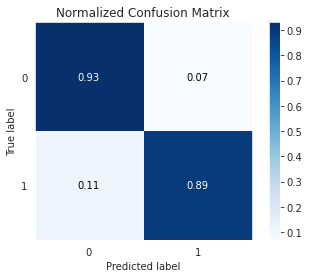

In [0]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_sample(X_train, y_train)

X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus)

ml_new_model = LogisticRegression()

ml_new_model.fit(X_rus_train, y_rus_train)

y_rus_pred = ml_new_model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_rus_pred, normalize=True)

##### **6.1.2.3 Comparação Over Sampling e Under Sampling**

Observa-se valores bem semelhantes entre os dois métodos.

Para transações criminosas o método apresentou o mesmo desempenho do que quando utilizado o *Over Sampling*, porém para transações normais houve uma pequena queda do desempenho:

* Over sampling: $$Recall_{(Class==0)} = 0.97$$
* Under sampling: $$Recall_{(Class==0)} = 0.93$$

Essa diferença de 5% pode trazer maiores prejuízos a um banco, logo neste projeto o método *Over Sampling* tem melhores resultados.

##### **6.2 Perspectiva da empresa através do modelo de ML**

![alt text](https://image.freepik.com/free-photo/qa-quality-assurance-quality-control-concept_31965-2290.jpg)

Por fim pensando em uma situação real onde um banco precisa ter o melhor modelo de predição possível para trazer a melhor a satisfação a seus clientes, observa-se que modelo que apresentou um desempenho mais eficaz foi o *Over Sampling*, assim abaixo foi levantado mais alguns pontos sobre a qualidade deste modelo.

De acordo com o dataset disponibilizado houve uma quantidade de transações no mês de setembro 2013 de:

* *(Class == 0)*:    284315
* *(Class == 1)*:       492

Será aplicado esses números para avaliar o modelo de machine learning, pois estes são a quantidade de transações reais em um mês.

Caso utilizado o  demodelo de *machine learnig* utilizando o método *Over Sampling* para transações normais *(Class == 0)*, este apresentou que 3% de seus clientes tem problemas com bloqueio errado de seus cartões de créditos, logo para esse mês setembro que tiveram 284315 transações normais isso representa uma quantidade de:


$$  Clientes_{prejudicados} = 284315 * 0.03 = 8529 $$

Para os casos onde a transação foram criminosas, assim os clientes tiveram seu cartão clonados e o modelo não detectou como transação criminosa foi de 11%, logo para esse mês setembro que tiveram 492 fraudes em transações isso representa uma quantidade de:

$$Clientes_{prejudicados} = 492 * 0.11 = 54$$

Totalizando **8583** clientes prejudicados.

Pensando em 8583 clientes prejudicados por mês e possivelmente insatisfeitos com os serviços do banco acaba sendo um grande número de clientes, isso pode trazer prejuízos lucrativos, desistências de cartões de crédito, perdas de clientes e entre outros fatores. Logo fica alguns pontos que podem ser levantados para um banco avaliar se o desempenho do modelo é bom:

* Quais são os índices dos concorrentes, estou no mesmo nível de segurança deles, trago alguma vantagem em meu modelo?
* Quais são os índices de segurança para os clientes, muitos estão sendo afetados?
* Qual o nível de qualidade sigma de serviços a companhia almeja?
* Em casos de problemas o quanto flexivel é o serviço da companhia para resolver o problema dos clientes?

Essas são apenas algumas perguntas que devem ser respondidas para conferir se o modelo realmente traz benfícios significativos a companhia, claramente esse modelo feito neste projeto foi bem simples, e esse modelo pode ser aperfeicoado e obtido resultados cada vez melhores.

## **7. Conslusão**

Através deste projeto tive o primeiro contato com aplicação em machine learning. Foram encontrados alguns desafios no projeto estes como o desbalanceamento de dados e os outliers presentes na variável *Amount*.

Foi proposto realizar a normalização da variável *Amount* para diminuir as discrepâncias dos pontos, o que deu certo pois o modelo não foi prejudicado.

A partir do desbalanceamento de dados foi possível perceber a diferença do antes e depois do balanceamento, e como a pequena quantidade de fraudes de transações atrapalhou o modelo, porém utilizando o método Under Sapling isso foi corrigido, e o predição do modelo melhorou significativamente para prever transações criminosas. 